#### Carraegar Dados

In [48]:
pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install -U tensorflow

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install -U numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 7.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import reduce
import pickle
import warnings
warnings.filterwarnings("ignore")

In [6]:
##from google.colab import files
#uploaded = files.upload()

In [7]:
#from google.colab import files
#uploaded = files.upload()

In [8]:
read_file = pd.read_excel('base de descrições.xlsx')
#print(read_file)


                 RAS                                          DESCRICAO  RAMO  \
0      5312021432135  - A CONDUTORA DO VEICULO SEGURADO CONDUZIA SEU...   531   
1      5312022143365  - A CONDUTORA DO VEICULO SEGURADO CONDUZIA SEU...   531   
2      5312022148942  - A CONDUTORA DO VEICULO SEGURADO CONDUZIA SEU...   531   
3       531202028008   Ao virar a esquina da rua Gentil de Mora com ...   531   
4       531202163576   CONDUTORA TRAFEGAVA NA AVENIDA EUCLIDES DA CU...   531   
...              ...                                                ...   ...   
87990   531202012566                                                NaN   531   
87991  5312011123882                      Descrição não obtida por erro   531   
87992  5312020123877  SEGURADO TRAFEGAVA AO PASSAR A ROTATORIA SAIDA...   531   
87993    53120128953                                                NaN   531   
87994   531202289529                                                NaN   531   

       SINISTRO   ANO      

###### Ler excel

In [9]:
read_file.to_csv (r'base_de_descricoes.csv', index = None, header=True)

###### Gerar csv

In [10]:
colnames=['DESCRICAO', 'GRAU', 'SITUAÇÃO DO SINISTRO']
df_01 = pd.read_csv("base_de_descricoes.csv" , usecols=colnames)
df_01.head(2)

,DESCRICAO,GRAU,SITUAÇÃO DO SINISTRO
0,- A CONDUTORA DO VEICULO SEGURADO CONDUZIA SEU...,COLISAO EM VEICULO ESTACIONADO,BAIXADO SEM RESSARCIMENTO
1,- A CONDUTORA DO VEICULO SEGURADO CONDUZIA SEU...,COLISAO EM VEICULO ESTACIONADO,BAIXADO SEM RESSARCIMENTO
2,- A CONDUTORA DO VEICULO SEGURADO CONDUZIA SEU...,ANIMAIS NA PISTA,BAIXADO SEM RESSARCIMENTO
3,Ao virar a esquina da rua Gentil de Mora com ...,COLISAO EM VEICULO ESTACIONADO,SEGURADO CULPADO
4,CONDUTORA TRAFEGAVA NA AVENIDA EUCLIDES DA CU...,INTERCEPTAÇÃO DE TRAJETORIA,BAIXADO COM RESSARCIMENTO
5,Estava parada Na Rua Cantagalo na Vila Carr...,INTERCEPTAÇÃO DE TRAJETORIA,BAIXADO COM RESSARCIMENTO
6,Meu veiculo estava estacionado em frente a mi...,COLISAO EM VEICULO ESTACIONADO,BAIXADO SEM RESSARCIMENTO
7,Motorista da kombi manobrava na garagem do en...,COLISAO EM VEICULO ESTACIONADO,SEGURADO CULPADO
8,NO DIA 18-05 O ONIBUS PLACA EZU1656 AVIACAO B...,COLISAO EM VEICULO ESTACIONADO,BAIXADO SEM RESSARCIMENTO
9,- O CONDUTOR DO VEICULO SEGURADO CONDUZIA SEU ...,COLISAO EM VEICULO ESTACIONADO,BAIXADO SEM RESSARCIMENTO


In [11]:
df_01.shape

(87995, 3)

##### Agrupar as categorias

In [12]:
#Agrupar as categorias
df_01['SITUAÇÃO DO SINISTRO'].value_counts()

SITUAÇÃO DO SINISTRO
BAIXADO SEM RESSARCIMENTO    78268
BAIXADO COM RESSARCIMENTO     7611
SEGURADO CULPADO              2116
Name: count, dtype: int64

In [13]:
df_02 = df_01

In [14]:
df_02['SITUAÇÃO DO SINISTRO'] = df_02['SITUAÇÃO DO SINISTRO'].replace('SEGURADO CULPADO', 'BAIXADO COM RESSARCIMENTO')

In [15]:
df_02['SITUAÇÃO DO SINISTRO'].value_counts()

SITUAÇÃO DO SINISTRO
BAIXADO SEM RESSARCIMENTO    78268
BAIXADO COM RESSARCIMENTO     9727
Name: count, dtype: int64

### Análise Exploratória e Limpeza

In [16]:
def show_null(df):
    null_columns = (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False).index

    null_data = pd.concat([df.isnull().sum(axis=0),
                           (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False),
                           df.loc[:, df.columns.isin(list(null_columns))].dtypes],
                          axis=1)

    null_data = null_data.rename(columns={0: '#',
                                          1: '% null',
                                          2: 'type'}).sort_values(ascending=False,
                                                                  by='% null')

    return null_data

In [17]:
def plot_num(df, feature):
    fig = plt.figure(figsize=(12,8))
    gs = GridSpec(1,2)
    sns.countplot(x=feature, data=df, color='firebrick', ax=fig.add_subplot(gs[0,0]))
    plt.xlabel(feature)
    sns.stripplot(x=df[feature], color='darkcyan', ax=fig.add_subplot(gs[0,1]))
    plt.xlabel(None)
    plt.show()


In [18]:
def plot_cat(df, feature):
    fig = plt.figure(figsize=(12,8))
    ax = sns.countplot(data=df, x=feature)
    for p in ax.patches:

        ax.annotate(f'\n{p.get_height()}',
                    (p.get_x()+0.4, p.get_height()+5),
                    ha='center',
                    color='black')

    plt.xlabel('\n' + feature)
    plt.ylabel('Quantidade de Clientes')
    plt.show()

In [19]:
show_null(df_02)

,#,% null,type
DESCRICAO,110,0.00125,object
GRAU,0,0.00000,object
SITUAÇÃO DO SINISTRO,0,0.00000,object


In [20]:
df_02.dropna(inplace=True)

In [21]:
show_null(df_02)

,#,% null,type
DESCRICAO,0,0.0,object
GRAU,0,0.0,object
SITUAÇÃO DO SINISTRO,0,0.0,object


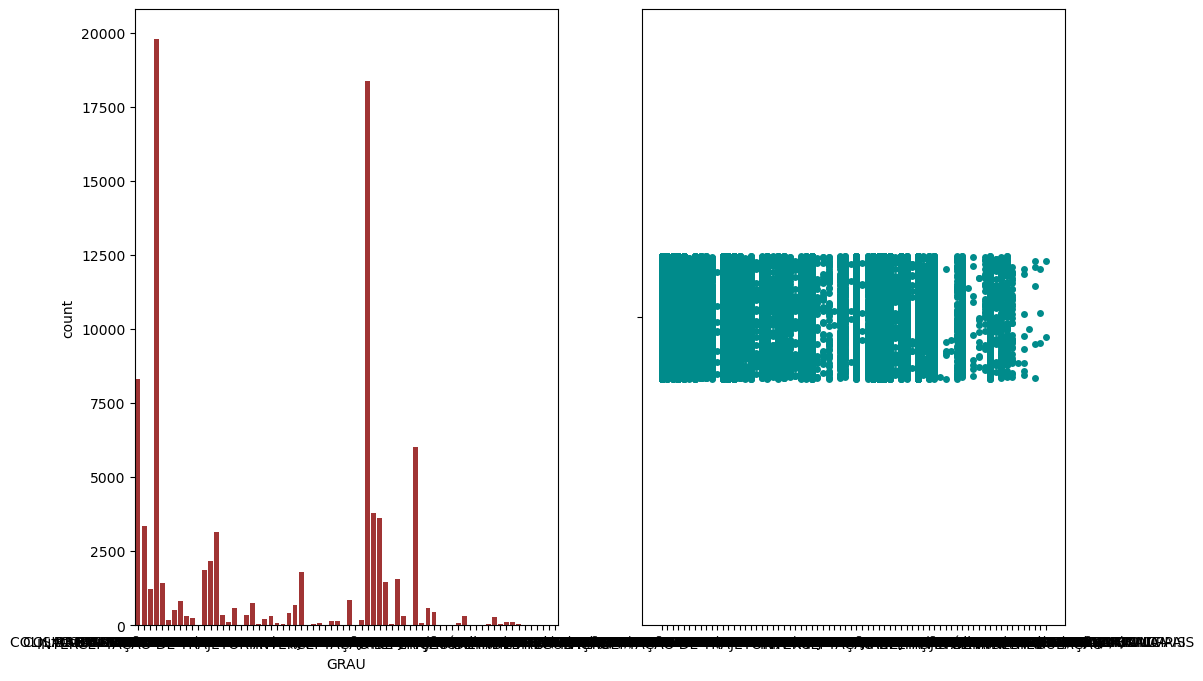

In [22]:
plot_num(df_02, 'GRAU')

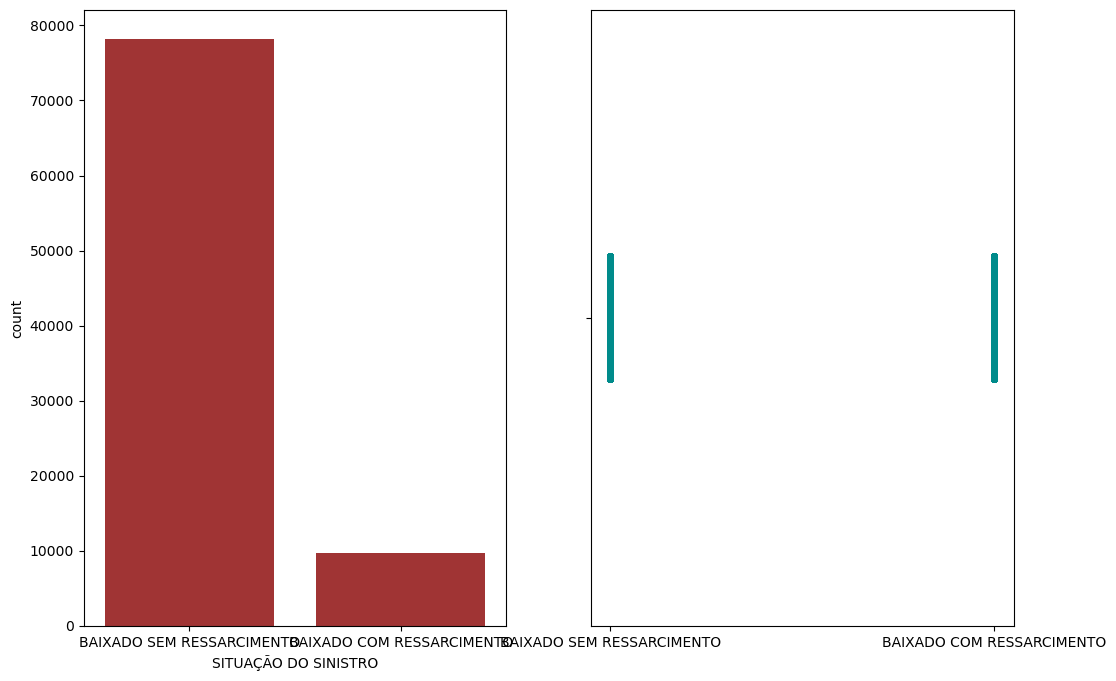

In [23]:
plot_num(df_02, 'SITUAÇÃO DO SINISTRO')

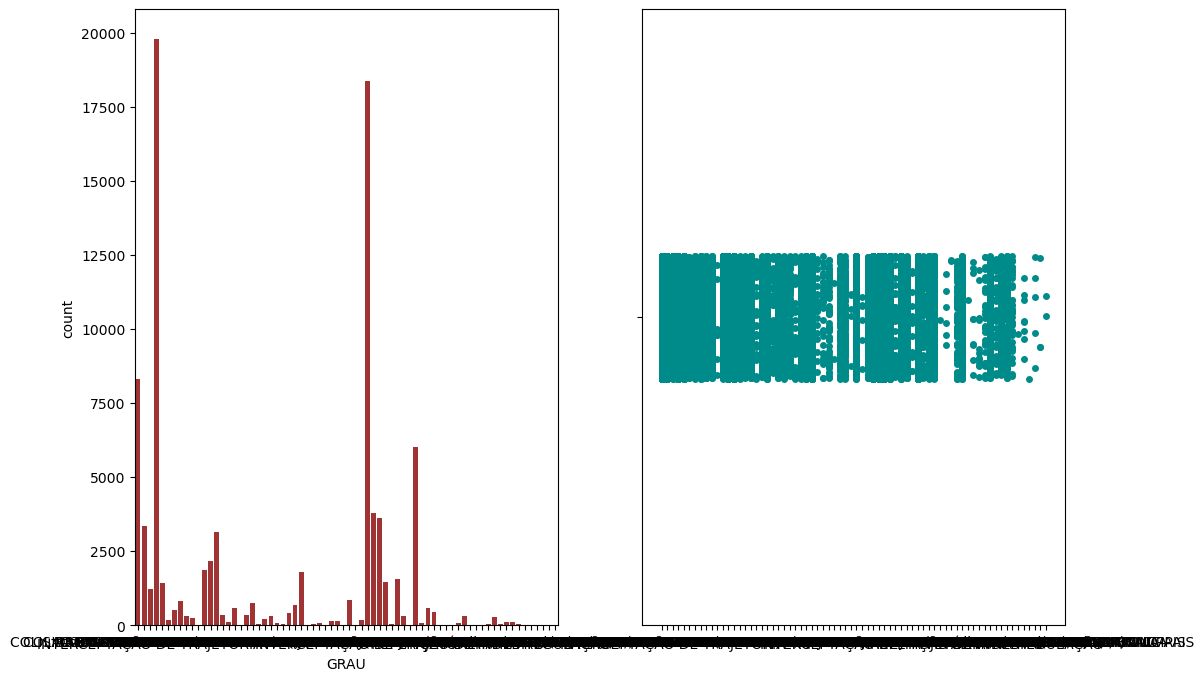

In [24]:
plot_num(df_02, 'GRAU')

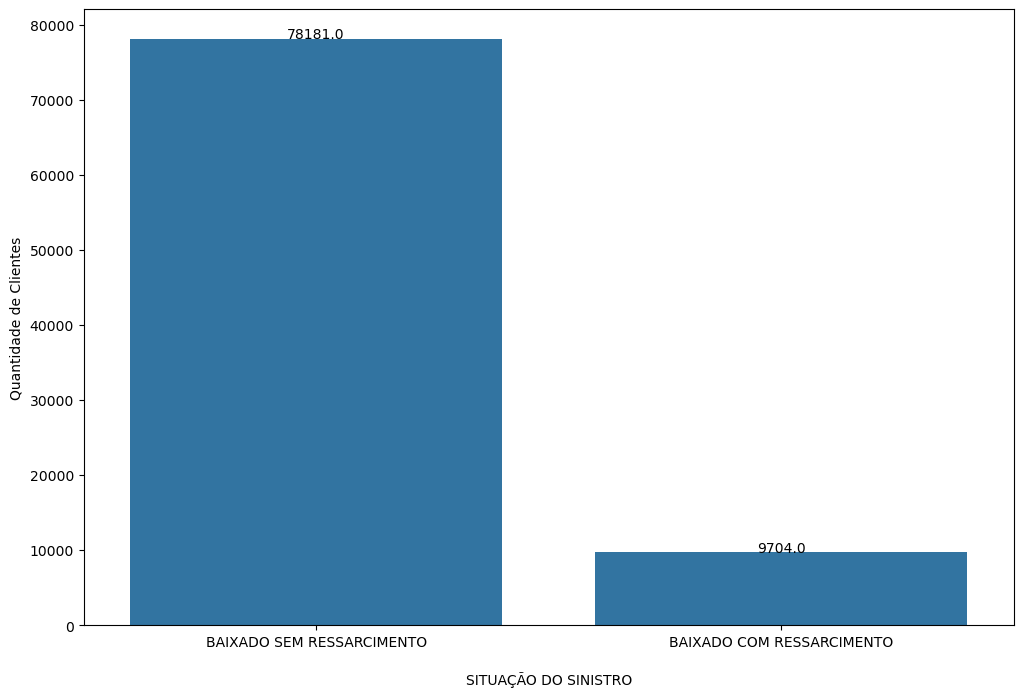

In [25]:
plot_cat(df_02, 'SITUAÇÃO DO SINISTRO')

### Machine Learning e Deep Learning para NLP na Prática

#### Introdução: classificação de texto

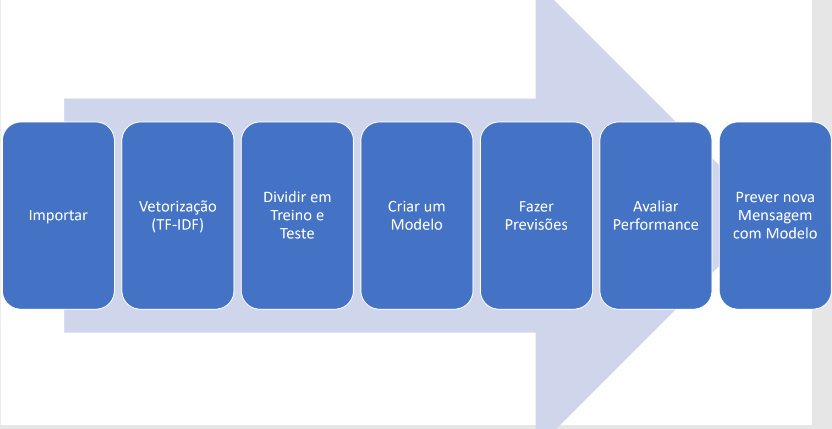

In [27]:
Image(filename='classificacoo de texto.png', width=1000, height=500)

##### Imports

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
df_02.shape

(87885, 3)

#### Classificação de ressarcimento parte 1

In [30]:
#Agrupar as categorias
df_02['SITUAÇÃO DO SINISTRO'].value_counts()

SITUAÇÃO DO SINISTRO
BAIXADO SEM RESSARCIMENTO    78181
BAIXADO COM RESSARCIMENTO     9704
Name: count, dtype: int64

In [31]:
previ = df_02['DESCRICAO']
classe = df_02['SITUAÇÃO DO SINISTRO']

In [32]:
vetorizador = TfidfVectorizer()
previsores = vetorizador.fit_transform(previ)
print(previsores.shape)

(87885, 69860)


In [33]:
print(vetorizador.get_feature_names_out()[10:100])

['0000323495' '0000325240' '0000365519' '0000390725' '0000419109'
 '0000511917' '0000535042' '0000598831' '0000609680' '0000619896'
 '000064627' '0000654389' '0000691361' '0000717866' '0000801063'
 '0000922925' '0000949470' '00009562662019' '0000966231' '0001'
 '0001009593' '0001040524' '0001075127' '0001080589' '0001083271'
 '0001121920' '0001232142' '0001264154' '0001559658' '0001621908'
 '0001678792' '0001778309' '0001784259' '00017890162021' '0001837129'
 '0002' '0002013474' '0002152743' '0002321540' '0002492606' '0003'
 '0003982' '00074' '000segurado' '001' '0010' '00115400621' '00123154395'
 '001272' '0016' '0017' '0019' '00196545780' '002' '0021' '002138738'
 '0022' '00220717702' '0023' '00233637265' '0024' '0025' '0027' '0028'
 '00281147316' '00287608646' '003' '00304217050' '00304751751'
 '00328328642' '00328864760' '0033' '00341' '0035' '0036' '00374334269'
 '0038' '00389278106' '0039' '004' '0040' '0041' '00411638777' '0042'
 '0044' '00450526879' '00456104216' '0046' '0049' 

#### Classificação de ressarcimento parte 2

In [34]:
#X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3)

In [35]:
#X_teste.shape

In [36]:
#floresta = RandomForestClassifier(n_estimators=500)
#floresta.fit(X_treinamento,y_treinamento)

In [37]:
#previsoes = floresta.predict(X_teste)
#print(previsoes)

In [38]:
#print(confusion_matrix(y_teste, previsoes))

In [39]:
#print(accuracy_score(y_teste, previsoes))
#print(metrics.classification_report(y_teste, previsoes))

In [40]:
#df_02.head(100)

In [41]:
#mensagem = df_02['DESCRICAO'][99]
#mensagem

In [42]:
#mensagem = [mensagem]
#mensagem = vetorizador.transform(mensagem)
#previsao = floresta.predict(mensagem)
#print(previsao)

#### Classificação com Redes Neurais


#### Implementando uma Rede Neural Parte 1

##### Imports

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
import numpy as np

##### Transformar texto em numeros

In [65]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df_02['SITUAÇÃO DO SINISTRO'])
print(y)

[1 1 1 ... 1 1 1]


In [71]:
mensagens = df_02['DESCRICAO'].values
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size=0.3)
#print(X_train)

In [ ]:
vetorizador = CountVectorizer()
vetorizador.fit(X_train)
X_train = vetorizador.transform(X_train)
X_test = vetorizador.transform(X_test)
print(X_train.toarray())

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
#X_train.toarray()[0]

In [ ]:
print(X_train.shape[1])

#### Implementando uma Rede Neural Parte 2

In [ ]:
modelo = Sequential()
modelo.add(Dense(units=10,activation="relu",input_dim=X_train.shape[1]))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=8,activation="relu")) ##  0 0u 1
modelo.add(Dropout(0.1))
modelo.add(Dense(units=1,activation="sigmoid")) #Camada de saida atua na probabilidade de ser 0 0u 1

#### Implementando uma Rede Neural Parte 3

In [ ]:
modelo.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
modelo.summary()

In [ ]:
modelo.fit(X_train, y_train,epochs=10,batch_size=10, verbose=True, validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = modelo.evaluate(X_test,y_test)
print("Loss: ", loss)
print("Acurácia: ", accuracy)

In [ ]:
nova_previsao = modelo.predict(X_test)
#print(nova_previsao)

In [ ]:
prev = (nova_previsao > 0.5)
#print(prev)

In [ ]:
cm = confusion_matrix(y_test, prev)
print(cm)

 #20 [[  729  2138]
 #[ 2772 20727]]

In [ ]:
cm = confusion_matrix(y_test, prev)
plt.matshow(cm, cmap='Matriz de Confusão')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Criando seu próprio Embeddings

##### Implementando uma Rede Neural com Embeddings Parte 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding


from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.metrics import classification_report


In [ ]:
df_02.head()

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df_02['DESCRICAO'])
print(y)

In [ ]:
mensagens = df_02['DESCRICAO'].values
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size=0.3)

In [ ]:
#print('Relatório de classificação:\n', classification_report(y_train, X_test, digits=4))


In [ ]:
token = Tokenizer(num_words=1000)
token.fit_on_texts(X_train)

X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

In [ ]:
print(X_train)

In [ ]:
X_train = pad_sequences(X_train, padding="post", maxlen=500) ## tamanho maximo para cada vetor
X_test = pad_sequences(X_test, padding="post", maxlen=500)
print(X_train) # Matriz Densa

In [ ]:
print(len(token.word_index))

##### Implementando uma Rede Neural com Embeddings Parte 2

In [ ]:
modelo = Sequential()
modelo.add(Embedding(input_dim=len(token.word_index), output_dim=50,input_length=500)) #output_dim tamanho do vetor denso/input_length comprimento da sequencia
modelo.add(Flatten())

modelo.add(Dense(units=10,activation="relu"))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=1,activation="sigmoid"))

In [ ]:
modelo.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
modelo.summary()

In [ ]:
modelo.fit(X_train, y_train,epochs=10,batch_size=10, verbose=True, validation_data=(X_test, y_test))

In [ ]:
loss, accuracy = modelo.evaluate(X_test,y_test)
print("Loss: ", loss)
print("Acurácia: ", accuracy)

In [ ]:
nova_previsao = modelo.predict(X_test)
print(nova_previsao)

In [ ]:
prev = (nova_previsao > 0.5)
#print(prev)

In [ ]:
cm = confusion_matrix(y_test, prev)
#print(cm)

In [ ]:
#print(classification_report(X_test,y_test))

In [ ]:
pip install transformers

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:

modelo.fit(X_train,y_train)
y_preds = modelo.predict(X_test)